In [1]:
import numpy as np
import os
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.optimizers import Adam
from keras.layers import Dense,Activation,Flatten,Input,Dropout,GlobalAveragePooling2D
from keras.models import Model
from keras.utils import np_utils
import random

import matplotlib.pyplot as plt

Using TensorFlow backend.
c:\users\zeesh\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\zeesh\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\zeesh\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\zeesh\anaco

In [14]:
base_path = "C:\\Users\zeesh\OneDrive\Desktop\dataset"
dirs = os.listdir(r"C:\Users\zeesh\OneDrive\Desktop\dataset")

In [15]:
print(dirs)

['Bulbasaur', 'Charmander', 'Pikachu']


In [16]:
folder_path = ""

In [17]:
image_data = []
labels = []

In [18]:
label_dict = {'Bulbasaur':0,'Charmander':1,'Pikachu':2}

In [19]:

for ix in dirs:
    path = os.path.join(base_path,ix)
    img_data = os.listdir(path)
    for im in img_data:
        img = image.load_img(os.path.join(path,im),target_size=(224,224))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[ix])

In [20]:
print(len(image_data), len(labels))

883 883


In [21]:
combined = list(zip(image_data, labels))
random.shuffle(combined)

image_data[:], labels[:] = zip(*combined)

In [22]:
X_train = np.array(image_data)
Y_train = np.array(labels)

print(X_train.shape,Y_train.shape)

(883, 224, 224, 3) (883,)


In [23]:
Y_train = np_utils.to_categorical(Y_train)
print(X_train.shape,Y_train.shape)

(883, 224, 224, 3) (883, 3)


In [24]:
model = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))

W0217 18:12:06.013017  5504 deprecation_wrapper.py:119] From c:\users\zeesh\anaconda3\envs\tensorflow_cpu\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0217 18:12:06.074003  5504 deprecation_wrapper.py:119] From c:\users\zeesh\anaconda3\envs\tensorflow_cpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0217 18:12:06.097005  5504 deprecation_wrapper.py:119] From c:\users\zeesh\anaconda3\envs\tensorflow_cpu\lib\site-packages\keras\backend\tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0217 18:12:06.305190  5504 deprecation_wrapper.py:119] From c:\users\zeesh\anaconda3\envs\tensorflow_cpu\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compa

94658560/94653016 [==============================] - 156s 2us/step


In [25]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [31]:
av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(256,activation='relu')(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(3,activation='softmax')(d1)

model_new = Model(inputs=model.input, outputs= fc2)
model_new.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [32]:
adam = Adam(lr=0.00003)
model_new.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [33]:
for ix in range(len(model_new.layers)):
    print(ix, model_new.layers[ix])

0 <keras.engine.input_layer.InputLayer object at 0x000001F86B7429B0>
1 <keras.layers.convolutional.ZeroPadding2D object at 0x000001F86B7429E8>
2 <keras.layers.convolutional.Conv2D object at 0x000001F86B742C18>
3 <keras.layers.normalization.BatchNormalization object at 0x000001F86715EDD8>
4 <keras.layers.core.Activation object at 0x000001F86715EEB8>
5 <keras.layers.convolutional.ZeroPadding2D object at 0x000001F86B72AEB8>
6 <keras.layers.pooling.MaxPooling2D object at 0x000001F8717AAAC8>
7 <keras.layers.convolutional.Conv2D object at 0x000001F86B898630>
8 <keras.layers.normalization.BatchNormalization object at 0x000001F86B89DD30>
9 <keras.layers.core.Activation object at 0x000001F86B89D6D8>
10 <keras.layers.convolutional.Conv2D object at 0x000001F871786FD0>
11 <keras.layers.normalization.BatchNormalization object at 0x000001F8446FA8D0>
12 <keras.layers.core.Activation object at 0x000001F84471FF60>
13 <keras.layers.convolutional.Conv2D object at 0x000001F844754898>
14 <keras.layers.conv

In [34]:
for ix in range(169):
    model_new.layers[ix].trainable = False
    
model_new.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model_new.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [35]:

hist = model_new.fit(X_train,Y_train,
                    shuffle = True,
                    batch_size = 16,
                    epochs = 5,
                    validation_split=0.20
                    )

W0217 18:17:56.560798  5504 deprecation.py:323] From c:\users\zeesh\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 706 samples, validate on 177 samples
Epoch 1/5
706/706 [==============================] - 223s 316ms/step - loss: 0.9848 - acc: 0.5439 - val_loss: 0.8087 - val_acc: 0.5650
Epoch 2/5
706/706 [==============================] - 226s 320ms/step - loss: 0.5946 - acc: 0.7507 - val_loss: 0.5800 - val_acc: 0.7232
Epoch 3/5
706/706 [==============================] - 220s 311ms/step - loss: 0.4578 - acc: 0.8286 - val_loss: 0.5151 - val_acc: 0.7740
Epoch 4/5
706/706 [==============================] - 219s 311ms/step - loss: 0.3589 - acc: 0.8824 - val_loss: 0.4799 - val_acc: 0.7684
Epoch 5/5
706/706 [==============================] - 209s 296ms/step - loss: 0.2839 - acc: 0.9193 - val_loss: 0.4384 - val_acc: 0.7910


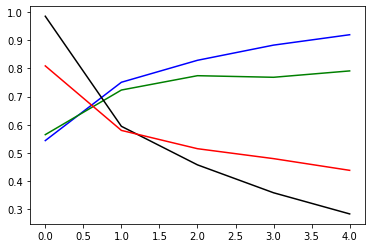

In [36]:

plt.figure(0)
plt.plot(hist.history['acc'],'b')
plt.plot(hist.history['val_acc'],'g')
plt.plot(hist.history['loss'],'black')
plt.plot(hist.history['val_loss'],'red')
plt.show()